<a href="https://colab.research.google.com/github/vladkudiurov89/Neural_Network/blob/master/Lesson%201(26.07.2020)/Light_variant_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from PIL import Image
%matplotlib inline 

In [60]:
# Dowload MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

In [ ]:
# Normalize and convert date
x_train = x_train_mnist.reshape(60000, 784)
x_test = x_test_mnist.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train_mnist, 10)
y_test = np_utils.to_categorical(y_test_mnist, 10)
x_train = x_train.reshape([-1, 28*28]) / 255.
x_test = x_test.reshape([-1, 28*28]) / 255.

In [65]:
# Create Neural Network
def create_model_nn():
  model = Sequential()
  model.add(Dense(800, input_dim=784,  activation='relu'))
  model.add(Dense(400,  activation='relu'))
  model.add(Dense(10, activation="softmax"))
  return model

In [66]:
# Training Neural Network
nn_model = create_model_nn()
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn_model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))
# print(nn_model.summary())

Epoch 1/15
469/469 [==============================] - 10s 21ms/step - loss: 0.7629 - accuracy: 0.7767 - val_loss: 0.3546 - val_accuracy: 0.8978
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 0.3344 - accuracy: 0.9021 - val_loss: 0.3110 - val_accuracy: 0.9090
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.2782 - accuracy: 0.9183 - val_loss: 0.2674 - val_accuracy: 0.9201
Epoch 4/15
469/469 [==============================] - 9s 20ms/step - loss: 0.2361 - accuracy: 0.9305 - val_loss: 0.2107 - val_accuracy: 0.9372
Epoch 5/15
469/469 [==============================] - 10s 21ms/step - loss: 0.1981 - accuracy: 0.9418 - val_loss: 0.1895 - val_accuracy: 0.9434
Epoch 6/15
469/469 [==============================] - 10s 21ms/step - loss: 0.1679 - accuracy: 0.9508 - val_loss: 0.1602 - val_accuracy: 0.9516
Epoch 7/15
469/469 [==============================] - 10s 21ms/step - loss: 0.1448 - accuracy: 0.9579 - val_loss: 0.1488 - val_accuracy: 0.

In [72]:
# Save and dowload Model
# nn_model.save_weights('model.h5')
# nn_model.load_weights('mode.h5')

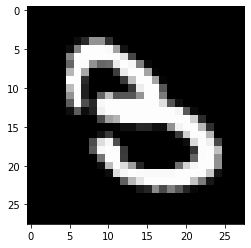

(784,)

In [102]:
# Test Image from MNIST
n_test = 18
plt.imshow(Image.fromarray(x_test_mnist[n_test]).convert('RGBA'))
plt.show()
x_test[n_test].shape

In [103]:
# Normalize Image
x = x_test[n_test]
x = np.expand_dims(x, axis=0)
x_pred = nn_model.predict(x)

In [104]:
# Result Model
prediction = np.argmax(x_pred)
print(f'Predict Image Number: {prediction}')
print(f'Valid Image Number: {y_test_mnist[n_test]}')

Predict Image Number: 3
Valid Image Number: 3
